In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import re, string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
dataframe_o3 = pd.read_csv("../data/raw/ticket-o3.csv", usecols = ['titolo','messaggio','categoria'])
dataframe_gc = pd.read_csv("../data/raw/ticket-gemini-claude.csv", usecols = ['titolo','messaggio','categoria'])

In [24]:
dataframe = pd.concat([dataframe_o3,dataframe_gc])
print(dataframe)

                                                titolo  \
0                                         Login Errore   
1                                Modifica Dati Profilo   
2                            Assistenza Sistema Scuola   
3                      Errore Prenotazione Ricevimento   
4                        Problema Visualizzazione Voti   
..                                                 ...   
861    Errore download file da area download riservata   
862  Richiesta di informazioni sui corsi di prepara...   
863  Problema con la visualizzazione dei documenti ...   
864  Informazioni sulle modalità di partecipazione ...   
865  Dubbio sull'utilizzo della sezione 'Area perso...   

                                             messaggio   categoria  
0    Buongiorno, sto riscontrando un problema con i...     Accesso  
1    Salve, ho notato che i miei dati di contatto n...     Profilo  
2    Buonasera, utilizzo regolarmente la piattaform...   Didattica  
3    Gentile team, ho prova

In [25]:
x=dataframe['categoria'].value_counts()
print(x)

categoria
Segreteria    1097
Didattica     1005
Tecnico        991
Accesso        904
Profilo        896
Name: count, dtype: int64


<Axes: xlabel='categoria', ylabel='count'>

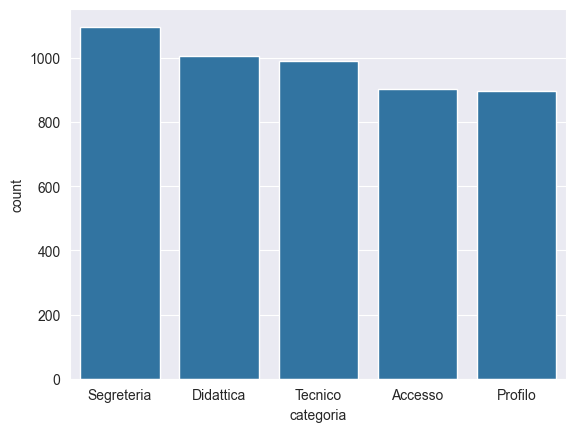

In [26]:
sns.barplot(x)

In [27]:
frame = dataframe['titolo'] + dataframe['messaggio']
print(frame)

0      Login ErroreBuongiorno, sto riscontrando un pr...
1      Modifica Dati ProfiloSalve, ho notato che i mi...
2      Assistenza Sistema ScuolaBuonasera, utilizzo r...
3      Errore Prenotazione RicevimentoGentile team, h...
4      Problema Visualizzazione VotiBuongiorno, duran...
                             ...                        
861    Errore download file da area download riservat...
862    Richiesta di informazioni sui corsi di prepara...
863    Problema con la visualizzazione dei documenti ...
864    Informazioni sulle modalità di partecipazione ...
865    Dubbio sull'utilizzo della sezione 'Area perso...
Length: 4893, dtype: object


In [29]:
dataframe['titolo_messaggio'] = dataframe['titolo'] + ' ' + dataframe['messaggio']
frame = dataframe[['combined_text', 'categoria']]
print(frame)

                                      titolo_messaggio   categoria
0    Login Errore Buongiorno, sto riscontrando un p...     Accesso
1    Modifica Dati Profilo Salve, ho notato che i m...     Profilo
2    Assistenza Sistema Scuola Buonasera, utilizzo ...   Didattica
3    Errore Prenotazione Ricevimento Gentile team, ...  Segreteria
4    Problema Visualizzazione Voti Buongiorno, dura...   Didattica
..                                                 ...         ...
861  Errore download file da area download riservat...     Tecnico
862  Richiesta di informazioni sui corsi di prepara...   Didattica
863  Problema con la visualizzazione dei documenti ...     Tecnico
864  Informazioni sulle modalità di partecipazione ...   Didattica
865  Dubbio sull'utilizzo della sezione 'Area perso...     Tecnico

[4893 rows x 2 columns]


In [30]:
train_set, test_set = train_test_split(dataframe, random_state=42, test_size=0.2)
print(train_set.shape, test_set.shape)

(3914, 4) (979, 4)


NameError: name 'frame' is not defined